In [2]:
%cd ../..

d:\ZYH\schoolwork\study\3-1\CS285\homework_fall2022\hw3


In [3]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.dpi'] = 300

''' Tags
{'images': [], 'audio': [], 'histograms': [], 
'scalars': ['Train_EnvstepsSoFar', 'TimeSinceStart', 
'Train_AverageReturn', 'Training_Loss', 'Train_BestReturn'], 
'distributions': [], 'tensors': [], 'graph': False, 
'meta_graph': False, 'run_metadata': []}
'''

def load_event_return(folder, key='Train_AverageReturn'):
    ea = EventAccumulator(f'data/{folder}')
    ea.Reload()
    # print(ea.Tags())
    df = pd.DataFrame(ea.Scalars(key))
    return np.array(df['step']), np.array(df['value'])

def plot_experiments(title, experiments, x_label='Iterations', y_label='Train_AverageReturn'):
    plt.figure()
    for name in experiments:
        folder = experiments[name]
        steps, value = load_event_return(folder)
        plt.plot(steps, value)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, axis='y', linestyle='--')
    plt.legend(experiments.keys(), loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
    plt.show()
    plt.close()


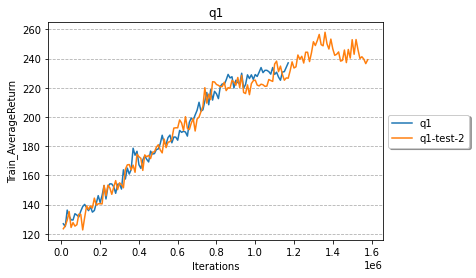

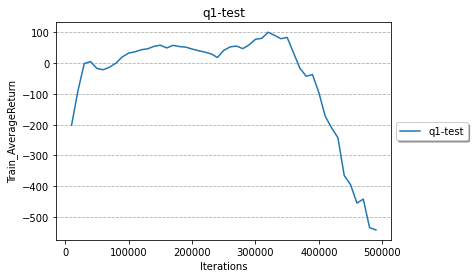

In [5]:
experiments = {
    'q1': 'q1_MsPacman-v0_02-10-2022_03-49-28',
    'q1-test-2': 'q1_MsPacman-v0_02-10-2022_16-51-20',
}
plot_experiments('q1', experiments)
experiments = {
    'q1-test': 'q1_LunarLander-v3_02-10-2022_04-13-21',
}
plot_experiments('q1-test', experiments)

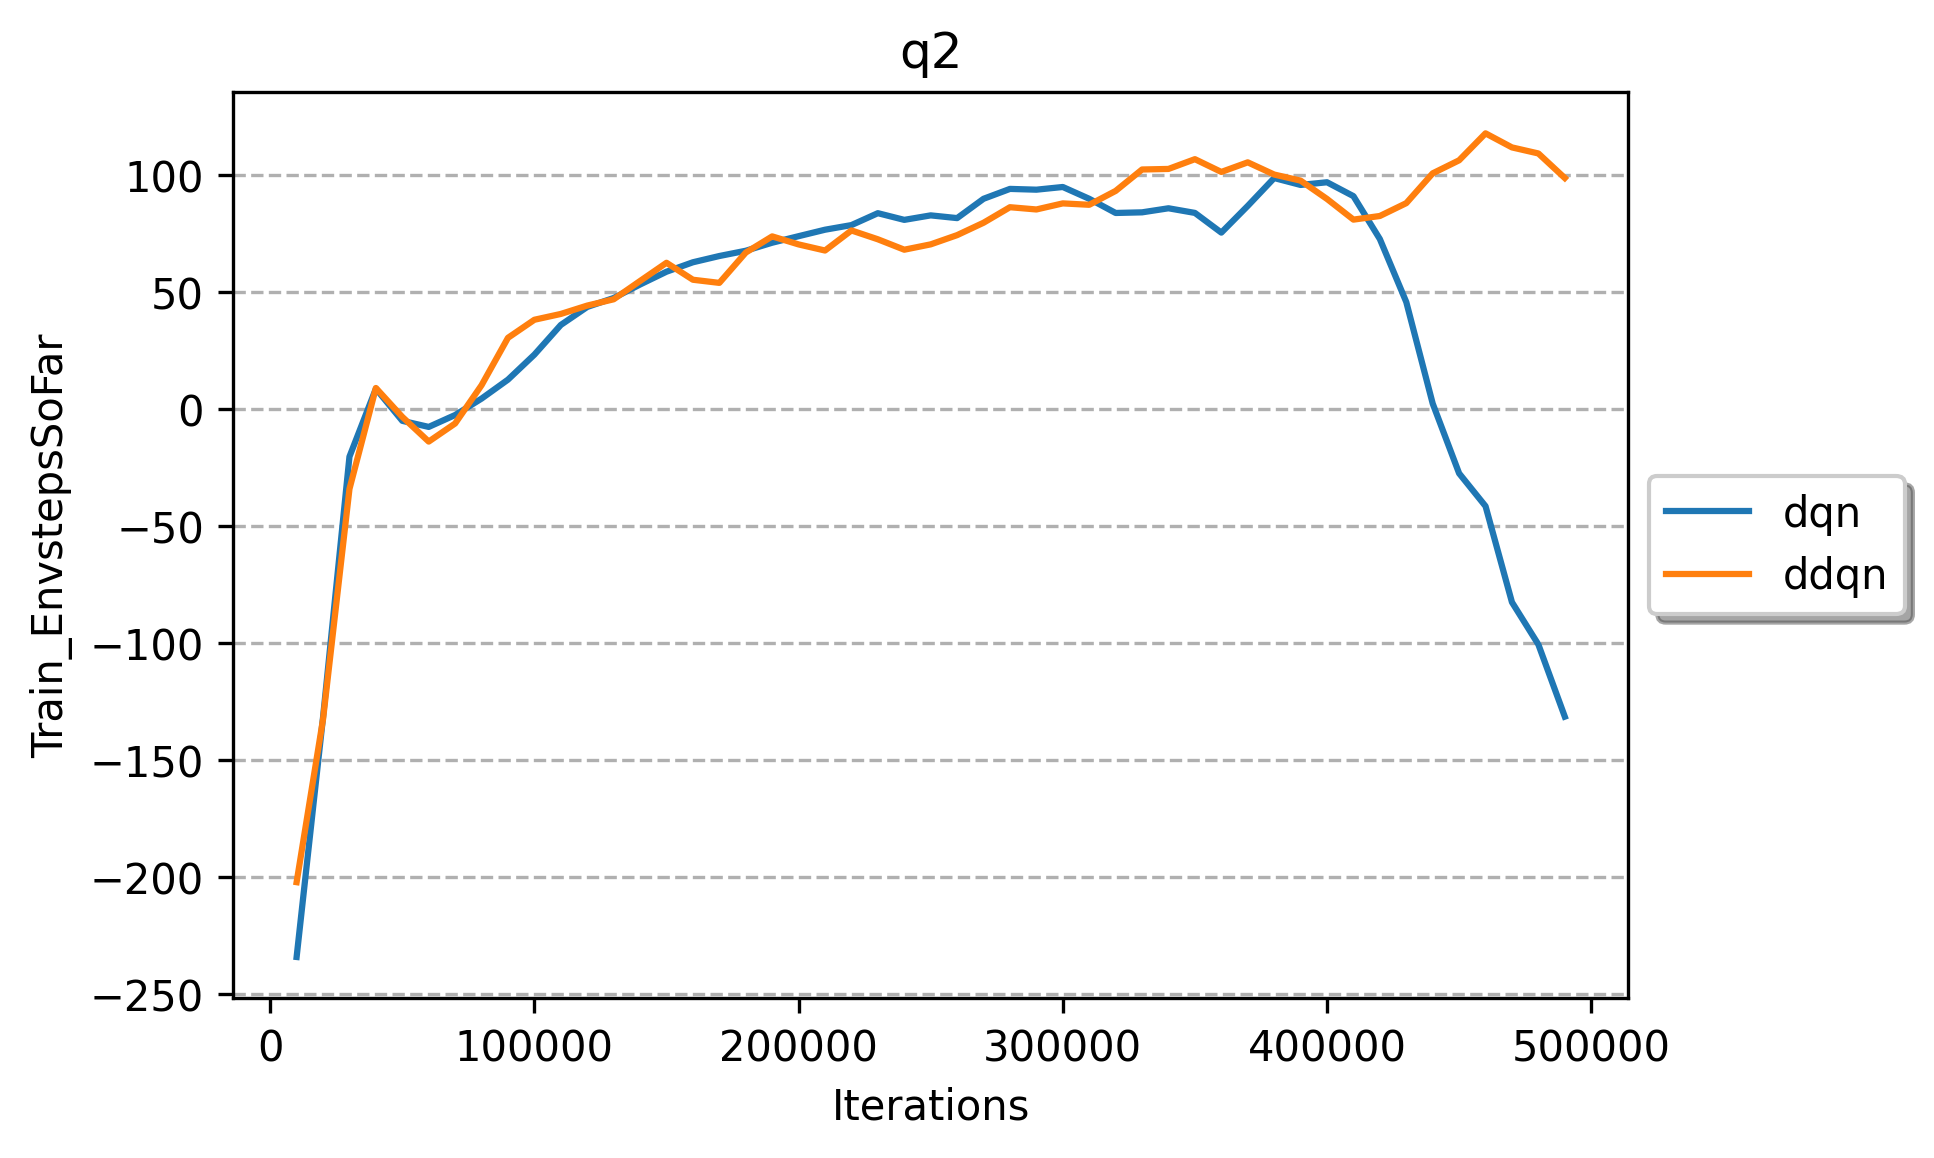

In [12]:
steps, ddqn1 = load_event_return('q2_doubledqn_1_LunarLander-v3_02-10-2022_04-32-46')
steps, ddqn2 = load_event_return('q2_doubledqn_2_LunarLander-v3_02-10-2022_04-53-01')
steps, ddqn3 = load_event_return('q2_doubledqn_3_LunarLander-v3_02-10-2022_05-14-07')
ddqn_avg = (ddqn1+ddqn2+ddqn3) / 3
steps, dqn1 = load_event_return('q2_dqn_1_LunarLander-v3_02-10-2022_05-46-58')
steps, dqn2 = load_event_return('q2_dqn_2_LunarLander-v3_02-10-2022_06-11-12')
steps, dqn3 = load_event_return('q2_dqn_3_LunarLander-v3_02-10-2022_06-35-28')
dqn_avg = (dqn1+dqn2+dqn3) / 3
plt.figure()
plt.plot(steps, dqn_avg)
plt.plot(steps, ddqn_avg)
plt.title('q2')
plt.xlabel('Iterations')
plt.ylabel('Train_EnvstepsSoFar')
plt.grid(True, axis='y', linestyle='--')
plt.legend(['dqn','ddqn'], loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
plt.show()
plt.close()

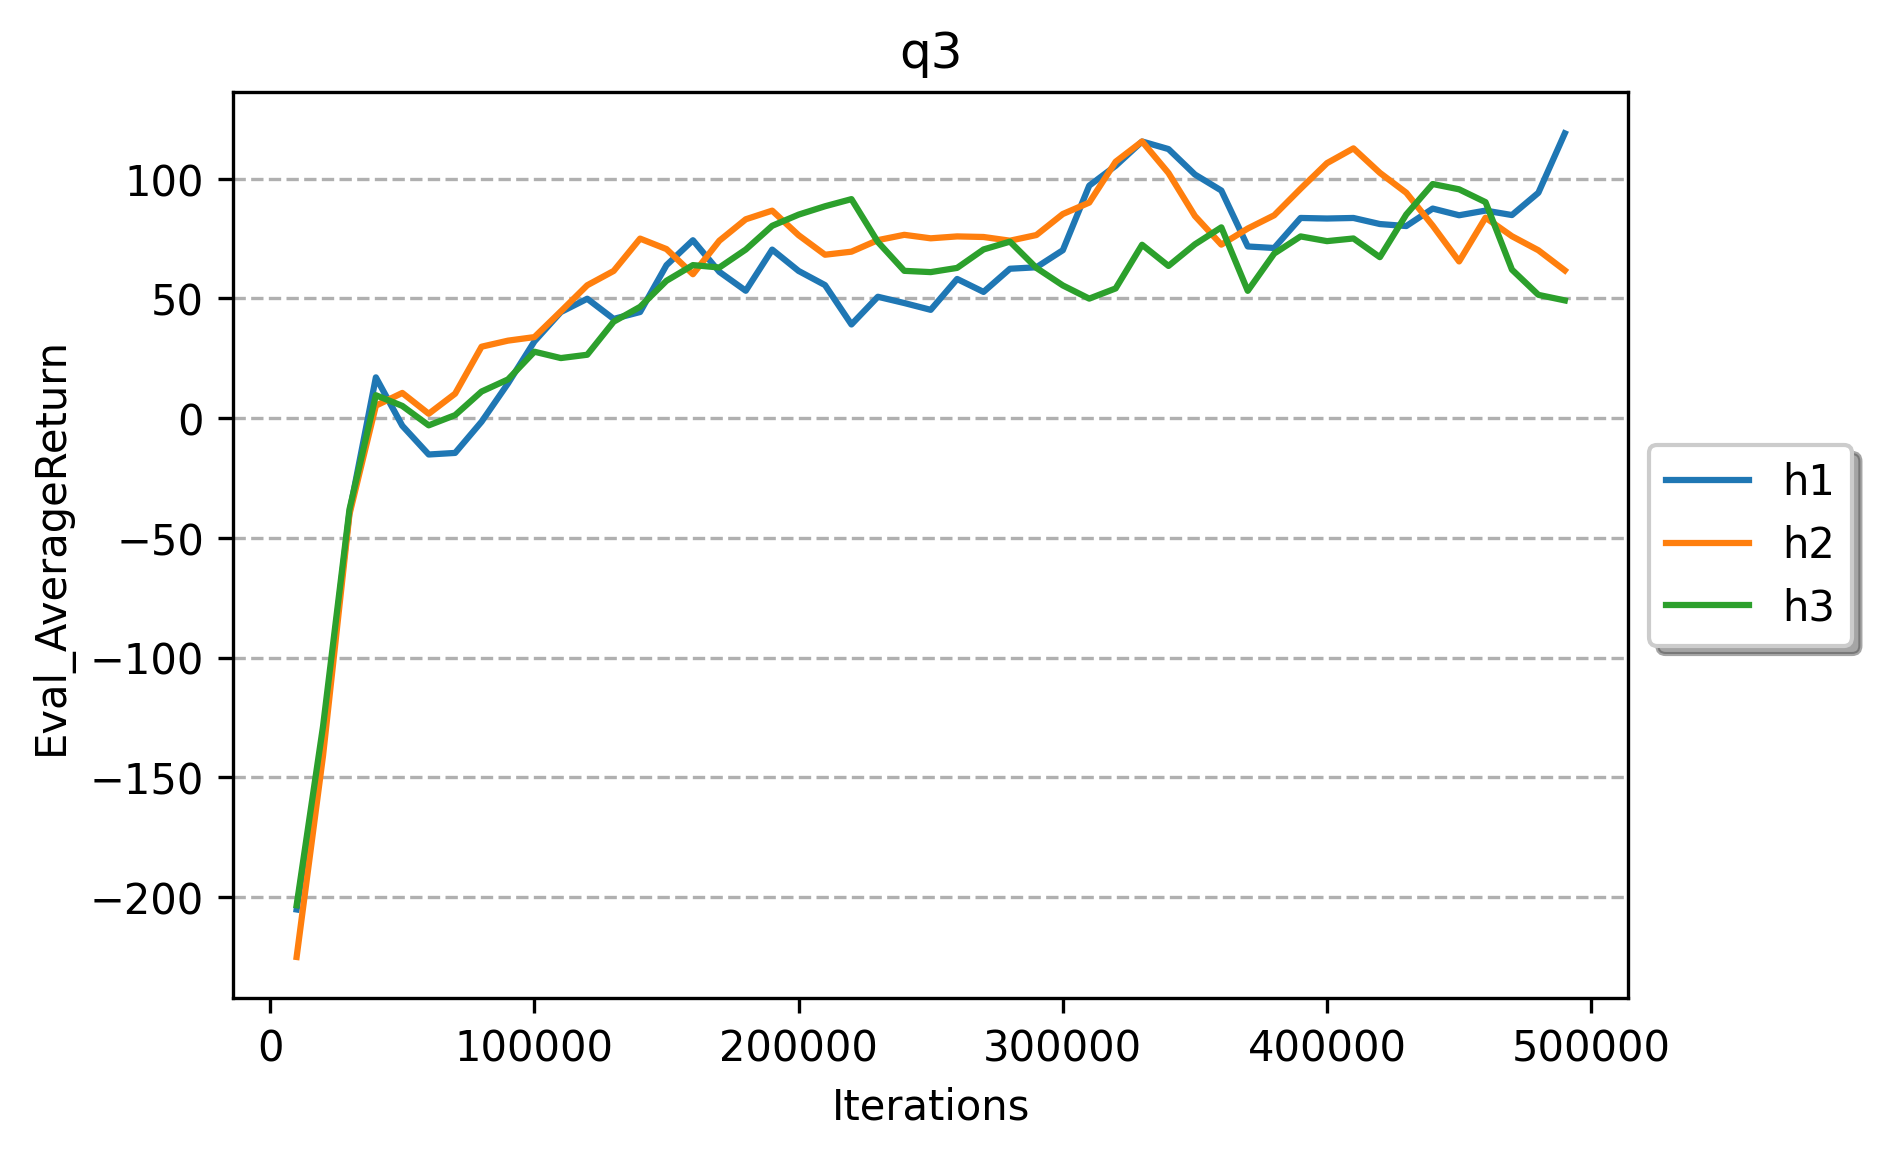

In [13]:
experiments = {
    'h1': 'q3_hparam1_LunarLander-v3_02-10-2022_06-37-49',
    'h2': 'q3_hparam2_LunarLander-v3_02-10-2022_06-58-00',
    'h3': 'q3_hparam3_LunarLander-v3_02-10-2022_07-18-23',
}
plot_experiments('q3', experiments)

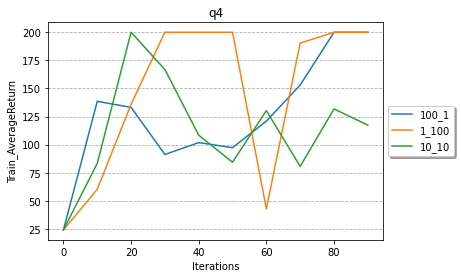

In [5]:
experiments = {
    '100_1': 'q4_100_1_CartPole-v0_02-10-2022_17-37-41',
    '1_100': 'q4_1_100_CartPole-v0_02-10-2022_17-38-55',
    '10_10': 'q4_10_10_CartPole-v0_02-10-2022_17-38-15',
}
plot_experiments('q4', experiments)